# Try this:

Last time, you worked my fit coefficient data.  Let's see if K-means can tell us anything interesting about those data.

Use the "eigen_target.dat" data set, but instead of using just the first eigenvector fit coefficients (as as you did in the lecture10 notebook), use all 5, i.e., all 5 columns.  Just work on the "target" data, not the "comparison" data (unless you feel like it.)

1. Perform K-means cluster analysis, and see if there is an optimal number of clusters.   Visualize the result by plotting the data.  Because there are 5 properties, there are 24 possible plots, so only plot the second and subsequent columns against the first column.

2. As we will learn when we talk about the origin of the data set, there is reason to believe that the data are not of all equal weight in describing what is going on with the data, but rather than there is a hierarchy, where the fit coefficients for the first eigenvector is more important than the fit coefficients for the second, and so on.  Moreover, we will want to use the resulting centroids.  So perform the K-means analysis without normalizing or scaling, see if there is an optimal number of clusters, and visualize the result.

3. Is there any difference between the results for 1 and 2?  Which do you think works better for the data?  Discuss.
_______________________
_________________________

In [2]:
# Initlialize Python stuff 
## Execute twice to make sure it takes effect
%pylab inline
import numpy as np
import scipy.stats

fontsize = 15
figsize = (10,6)
dpi = 170
# Configure parameters
plt.rcParams.update({'font.size': fontsize, 'figure.figsize': figsize, 'figure.dpi': dpi})

# Default tick label size
plt.rcParams['text.usetex'] = True
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1

plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.linewidth'] = 1

Populating the interactive namespace from numpy and matplotlib


/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['figsize']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
# Read in our data
e1, e2, e3, e4, e5 =np.loadtxt('eigen_target.dat', unpack = True)
print(e1)

    

[-35.6208     1.63252    1.23565    3.30624    0.754751 -51.2977
   2.70171    1.9685     2.57728  -11.7583     3.73897   -4.14898
  -8.29602  -27.4512   -47.5302     2.8153     3.23211  -50.8591
 -20.6238   -14.8972     4.15541  -24.9636    -5.75928    3.32247
 -15.6683     0.870669 -16.5296    -1.59083   -8.89482  -10.2789  ]


## a)
For the first part of the analysis, we will assume that each coefficient has equal weight. Our first step of the k-means analysis for this case  is to normalize and scale the data by subtracting the mean and dividing the standard deviation:

In [6]:
e1 = (e1-np.mean(e1)) / np.std(e1)
e2 = (e2-np.mean(e2)) / np.std(e2)
e3 = (e3-np.mean(e3)) / np.std(e3)
e4 = (e4-np.mean(e4)) / np.std(e4)
e5 = (e5-np.mean(e5)) / np.std(e5)

print(e1)

[-1.48961853  0.74570767  0.72189411  0.84613657  0.69303853 -2.43028598
  0.80986271  0.76586761  0.80239649 -0.05778718  0.87210185  0.39879796
  0.14996142 -0.99941468 -2.20422313  0.8166785   0.84168852 -2.40396848
 -0.58974741 -0.24613188  0.89708967 -0.8501502   0.30217447  0.84711043
 -0.29240051  0.69999401 -0.34408145  0.55229568  0.11403138  0.03098186]


(It would probably be a better idea to read in all of these eigenvalues as a multidimmensional array and then preform a loop through each, but this gets the job done.) Let's try to get a better look at the data by plotting the first eigenvector vs the others:

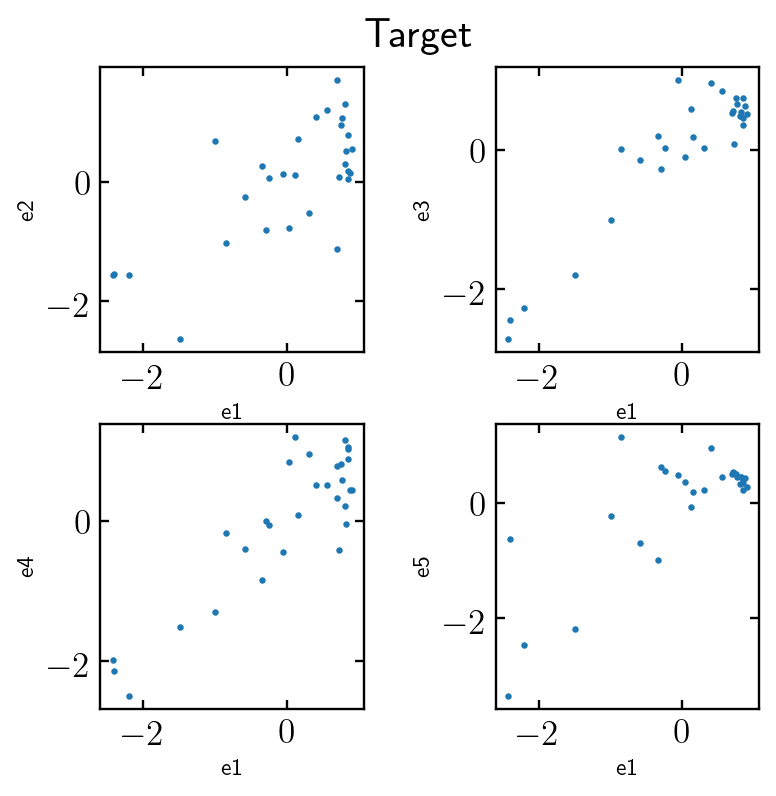

In [7]:
fig, axs = plt.subplots(2,2, facecolor='w', edgecolor='k', dpi = 170,figsize = [5,5])
fig.suptitle("Target", x =0.5, y = 0.94)
fig.subplots_adjust(hspace = 0.25, wspace=.5)


axs = axs.ravel()

vec_list = [e2,e3,e4,e5]


for i in range(0,4):
    
    
    axs[i].scatter(e1,vec_list[i], s = 3)
    axs[i].set_ylabel('e'+str(i+2), fontsize = 10)
    axs[i].set_xlabel('e1', fontsize = 10)



Preform the clustering analysis:

In [8]:
from scipy.cluster.vq import kmeans,vq

#Input data must have particular shape:
temp=np.vstack((e1,e2,e3,e4,e5))
properties=temp.T

print (properties.shape)


(30, 5)


Our first step is to determine the ideal number of clusters. We can get some idea of this by constructing an elbow plot as follows:

 - Compute the total variance of the data set, using the global mean.
 - For each number of clusters (i.e., 2,3,4, etc), compute the total variance again, but now the mean that is used is the mean for each cluster.  

In [9]:

def get_mean(properties):
    numproperties=properties.shape[1]
    tempmean=np.zeros(numproperties)
    for i in range(numproperties):
        tempmean[i]=properties[:,i].mean()
    return tempmean

def get_total_variance(properties,tempmean):
    numproperties=properties.shape[1]
    tempvariance=np.zeros(numproperties)
    for i in range(numproperties):
        tempvariance[i]=((properties[:,i]-tempmean[i])**2).sum()
    return tempvariance.sum()

global_mean=get_mean(properties)

global_variance=get_total_variance(properties,global_mean)

In [10]:
# Inspect 
print ('Global mean: ' + str(global_mean))
print ('Global variance: ' + str(global_variance))

Global mean: [-9.21716407e-17 -4.07081776e-17  3.14563190e-17 -5.55111512e-17
  4.07081776e-17]
Global variance: 150.00000000000003


In [11]:
# Cycle through number of clusters:
numclusters=np.linspace(2,10,9)
print (numclusters)
cluster_variance=np.zeros(numclusters.shape[0])

# for each number of clusters, run the k-means, then get the variance for each 
for i in (numclusters):
    current_num_clusters=np.int(i)
    print ('The number of clusters is ',current_num_clusters)
    centroids,_ = kmeans(properties,current_num_clusters)
    idx,_ = vq(properties,centroids)
    temp_cluster_variance=np.zeros(current_num_clusters)
    for j in range(np.int(i)):
        temp_cluster_variance[j]=get_total_variance(properties[idx==j,:],centroids[j])
#       print (temp_cluster_variance.shape,temp_cluster_variance[j])
    cluster_variance[np.int(i)-2]=temp_cluster_variance.sum()
    print ('The total variance is ',temp_cluster_variance.sum())

[ 2.  3.  4.  5.  6.  7.  8.  9. 10.]
The number of clusters is  2
The total variance is  48.345408563218214
The number of clusters is  3
The total variance is  31.532347832913775
The number of clusters is  4
The total variance is  23.692010023484936
The number of clusters is  5
The total variance is  20.59525107169819
The number of clusters is  6
The total variance is  16.912407213791077
The number of clusters is  7
The total variance is  14.005338133859848
The number of clusters is  8
The total variance is  11.763237512896826
The number of clusters is  9
The total variance is  9.682677675757317
The number of clusters is  10
The total variance is  9.32538481762596


Text(0, 0.5, 'Fraction of Variance Explained')

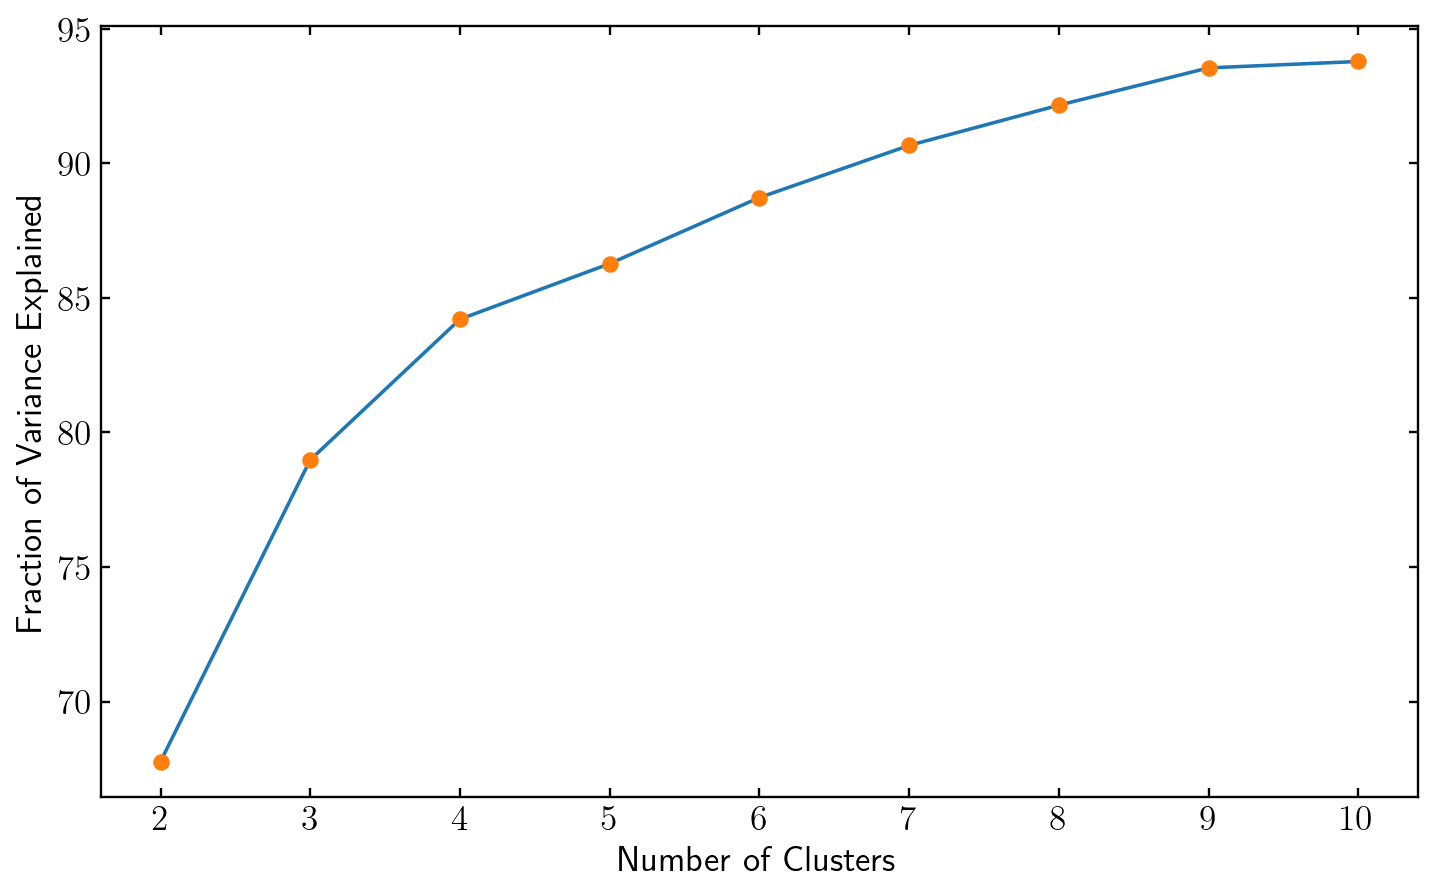

In [12]:
# Plot
plt.plot(numclusters,(global_variance-cluster_variance)*100/global_variance)
plt.plot(numclusters,(global_variance-cluster_variance)*100/global_variance,'o')

plt.xlabel('Number of Clusters')
plt.ylabel('Fraction of Variance Explained')

The ideal number of clusters looks like it might be 4 since this is when the slope really starts to mellow out:

In [13]:
# Assign clusters 
centroids,_ = kmeans(properties,4) # Five-element vecotr (in this case) expressing cluseter locations
idx,_ = vq(properties,centroids) # Assigns cluster membership (4 options)

print (idx.shape)
print (idx.min(),idx.max())
print (centroids)

(30,)
0 3
[[ 0.6773147   0.71020592  0.59014079  0.64331659  0.40114048]
 [-2.13202403 -1.83569726 -2.31004606 -2.0334871  -2.15371029]
 [-0.64441451  0.23247196 -0.31507232 -0.84760822 -0.62610062]
 [ 0.0377024  -0.50096445  0.16666116  0.12837802  0.55950447]]


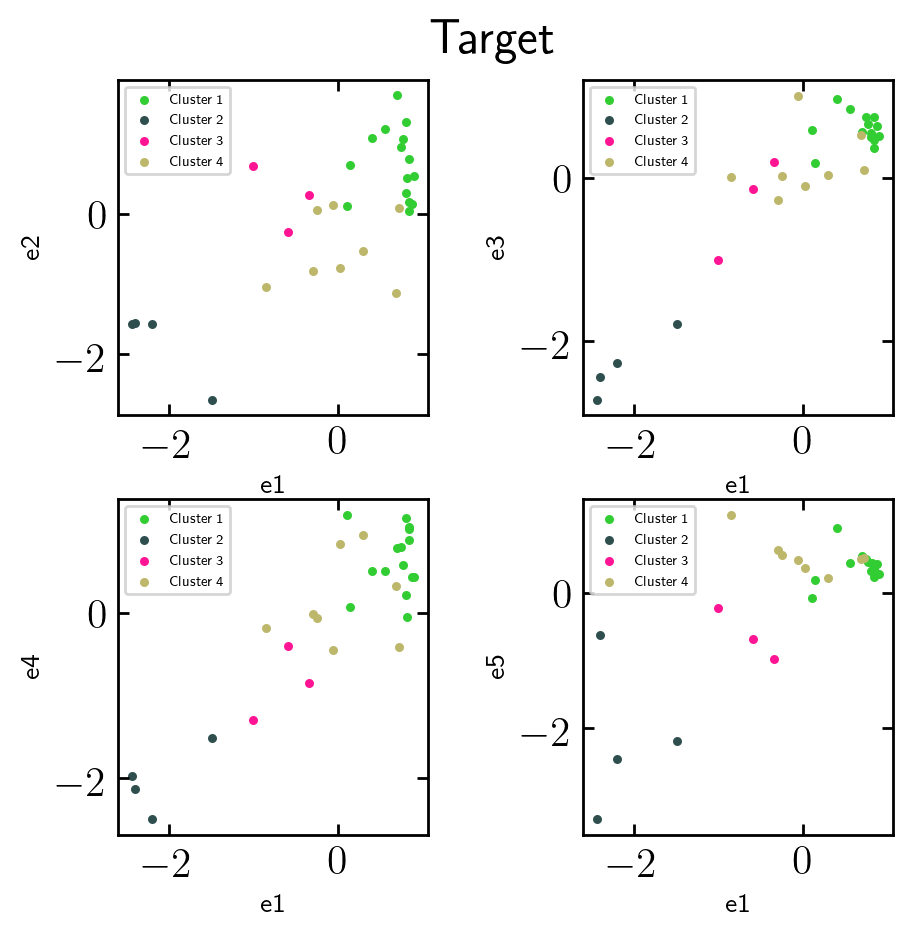

In [15]:
# Plot
fig, axs = plt.subplots(2,2, facecolor='w', edgecolor='k', dpi = 200,figsize = [5,5])
fig.suptitle("Target", x =0.5, y = 0.94)
fig.subplots_adjust(hspace = 0.25, wspace=.5)


axs = axs.ravel()

vec_list = [e2,e3,e4,e5]

for i in range(0,4):
    
    
    axs[i].scatter(e1[idx ==0],vec_list[i][idx==0], s = 5, color = 'limegreen', label = 'Cluster 1')
    axs[i].scatter(e1[idx ==1],vec_list[i][idx==1], s = 5, color = 'darkslategray', label = 'Cluster 2')
    axs[i].scatter(e1[idx ==2],vec_list[i][idx==2], s = 5, color = 'deeppink', label = 'Cluster 3')
    axs[i].scatter(e1[idx ==3],vec_list[i][idx==3], s = 5, color = 'darkkhaki', label = 'Cluster 4')
    axs[i].set_ylabel('e'+str(i+2), fontsize = 10)
    axs[i].set_xlabel('e1', fontsize = 10)
    axs[i].legend(fontsize = 5, loc = 'upper left')



_________________________

## b)
In part a), we assumed that the data was equally weighted. We'll see how the cluster analysis compares if we don't make that assumption, i.e., if we don't scale and normalize the data:


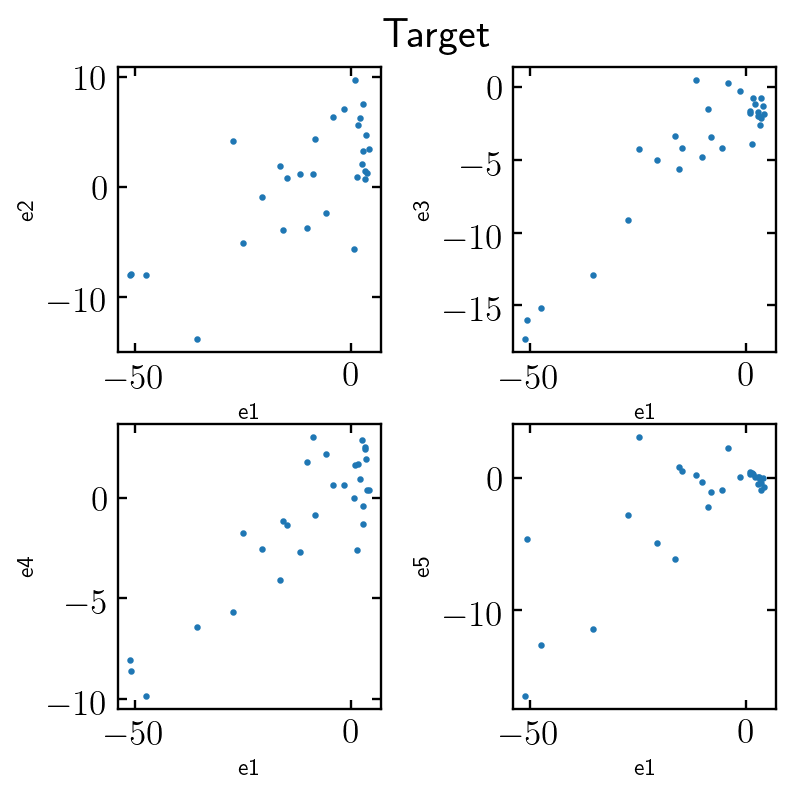

In [16]:
e1, e2, e3, e4, e5 =np.loadtxt('eigen_target.dat', unpack = True)
fig, axs = plt.subplots(2,2, facecolor='w', edgecolor='k', dpi = 170,figsize = [5,5])
fig.suptitle("Target", x =0.5, y = 0.94)
fig.subplots_adjust(hspace = 0.25, wspace=.5)


axs = axs.ravel()

vec_list = [e2,e3,e4,e5]


for i in range(0,4):
    
    
    axs[i].scatter(e1,vec_list[i], s = 3)
    axs[i].set_ylabel('e'+str(i+2), fontsize = 10)
    axs[i].set_xlabel('e1', fontsize = 10)


In [17]:
#Input data must have particular shape:
temp=np.vstack((e1,e2,e3,e4,e5))
properties=temp.T

def get_mean(properties):
    numproperties=properties.shape[1]
    tempmean=np.zeros(numproperties)
    for i in range(numproperties):
        tempmean[i]=properties[:,i].mean()
    return tempmean

def get_total_variance(properties,tempmean):
    numproperties=properties.shape[1]
    tempvariance=np.zeros(numproperties)
    for i in range(numproperties):
        tempvariance[i]=((properties[:,i]-tempmean[i])**2).sum()
    return tempvariance.sum()

global_mean=get_mean(properties)

global_variance=get_total_variance(properties,global_mean)


# Cycle through number of clusters:
numclusters=np.linspace(2,10,9)
print (numclusters)
cluster_variance=np.zeros(numclusters.shape[0])

# for each number of clusters, run the k-means, then get the variance for each 
for i in (numclusters):
    current_num_clusters=np.int(i)
    print ('The number of clusters is ',current_num_clusters)
    centroids,_ = kmeans(properties,current_num_clusters)
    idx,_ = vq(properties,centroids)
    temp_cluster_variance=np.zeros(current_num_clusters)
    for j in range(np.int(i)):
        temp_cluster_variance[j]=get_total_variance(properties[idx==j,:],centroids[j])
#       print (temp_cluster_variance.shape,temp_cluster_variance[j])
    cluster_variance[np.int(i)-2]=temp_cluster_variance.sum()
    print ('The total variance is ',temp_cluster_variance.sum())



[ 2.  3.  4.  5.  6.  7.  8.  9. 10.]
The number of clusters is  2
The total variance is  3349.8946010741465
The number of clusters is  3
The total variance is  1389.8466351887503
The number of clusters is  4
The total variance is  988.2721253808115
The number of clusters is  5
The total variance is  839.1974216807422
The number of clusters is  6
The total variance is  658.9215852237797
The number of clusters is  7
The total variance is  676.6268325264782
The number of clusters is  8
The total variance is  512.658772530327
The number of clusters is  9
The total variance is  455.76745173989224
The number of clusters is  10
The total variance is  384.75356867919515


In [20]:
print(global_mean)

[-10.795235     0.46327867  -4.32626153  -1.15158631  -1.9023992 ]


Text(0, 0.5, 'Fraction of Variance Explained')

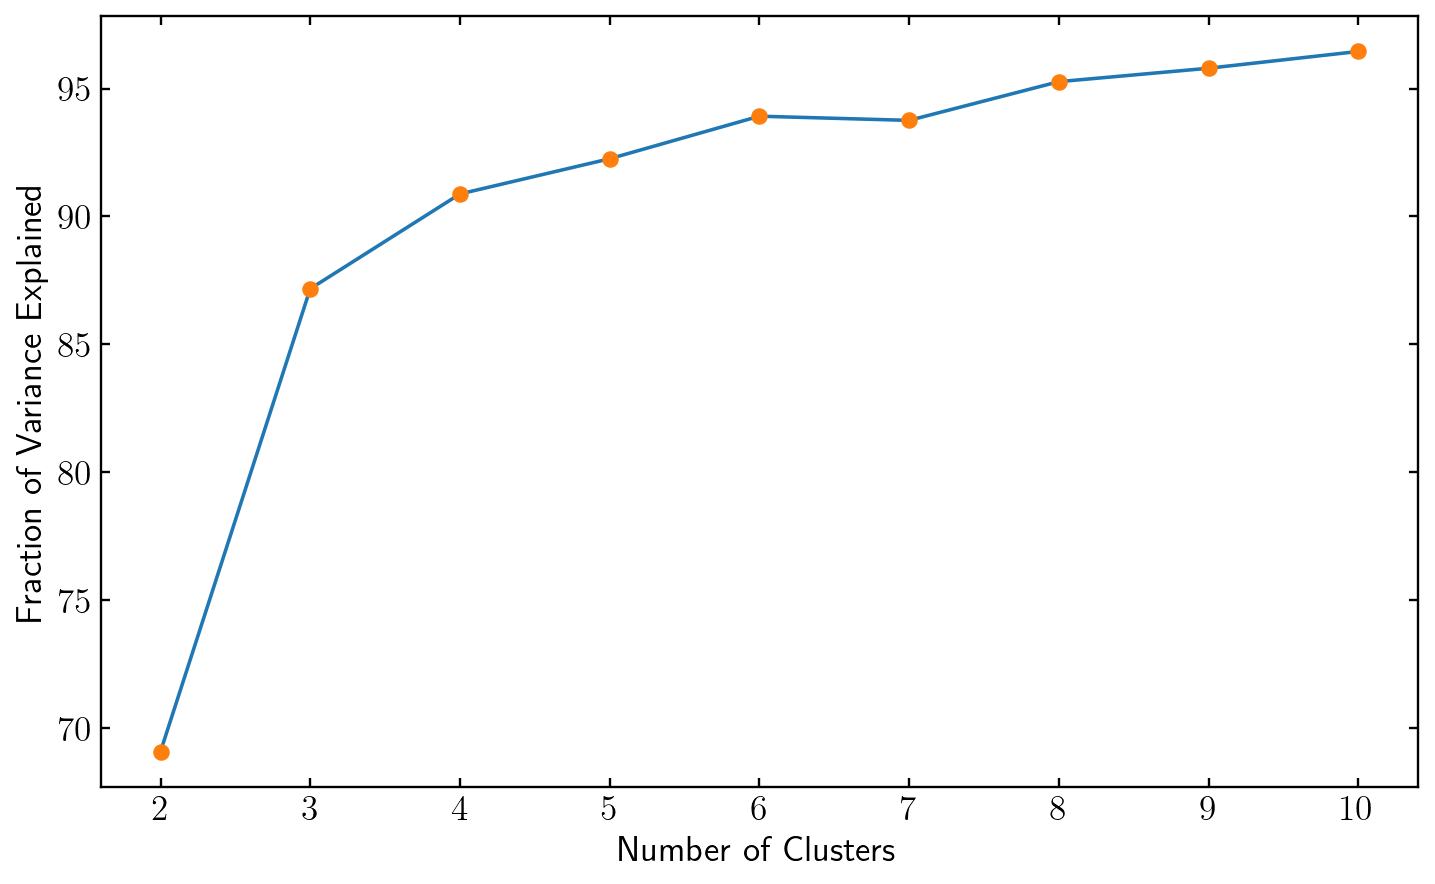

In [18]:
# Plot
plt.plot(numclusters,(global_variance-cluster_variance)*100/global_variance)
plt.plot(numclusters,(global_variance-cluster_variance)*100/global_variance,'o')

plt.xlabel('Number of Clusters')
plt.ylabel('Fraction of Variance Explained')

So now it looks like the ideal number of clusters should be three:

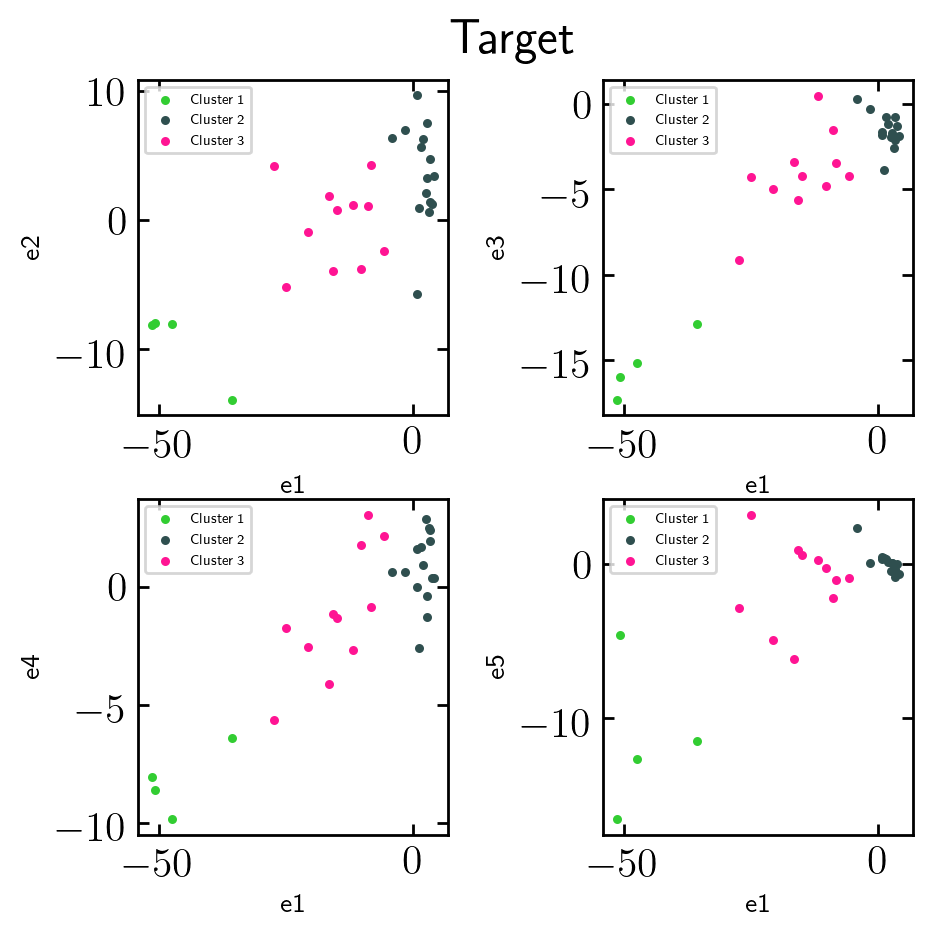

In [19]:
# Assign clusters 
centroids,_ = kmeans(properties,3) # Five-element vecotr (in this case) expressing cluseter locations
idx,_ = vq(properties,centroids) # Assigns cluster membership (3 options)


# Plot
fig, axs = plt.subplots(2,2, facecolor='w', edgecolor='k', dpi = 200,figsize = [5,5])
fig.suptitle("Target", x =0.5, y = 0.94)
fig.subplots_adjust(hspace = 0.25, wspace=.5)


axs = axs.ravel()

vec_list = [e2,e3,e4,e5]

for i in range(0,4):
    
    
    axs[i].scatter(e1[idx ==0],vec_list[i][idx==0], s = 5, color = 'limegreen', label = 'Cluster 1')
    axs[i].scatter(e1[idx ==1],vec_list[i][idx==1], s = 5, color = 'darkslategray', label = 'Cluster 2')
    axs[i].scatter(e1[idx ==2],vec_list[i][idx==2], s = 5, color = 'deeppink', label = 'Cluster 3')
    axs[i].set_ylabel('e'+str(i+2), fontsize = 10)
    axs[i].set_xlabel('e1', fontsize = 10)
    axs[i].legend(fontsize = 5, loc = 'upper left')

______________________________________________

## c)

The main difference between the analyses in part a) and b) is the most likely number of clusters in the data. We see that the four clusters in part a) sort of overlap, whereas the the three clusters identified in part b) are more distinct. Therefore the decision to not normalize and scale the data in part b) seems more consistent with our data. 

Thus, I would argue that the eigenvectors in our analysis do not have equal weights.